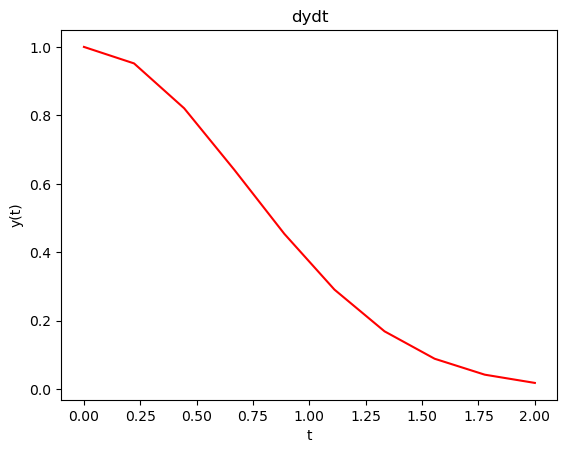

In [24]:
#import library
import numpy as np
import scipy as sc
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#differential equation
def dydt(y,t):
    dydt=-2*y*t
    return dydt

#Initial condition
y0=1

#create x-axis for integration
start=0
end=2

t=np.linspace(start,end,10)

#integration of differential equation
y=sc.integrate.odeint(dydt,y0,t)

#plot result
plt.figure()
plt.plot(t, y, 'r')
plt.title(f'dydt')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

In [16]:
#import library
import numpy as np
from numpy.linalg import solve

A=np.array([[2,4,6],[5,3,2],[7,8,9]])  #define coefficient matrix A

B=np.array([[18],[13],[30]])  #define constant vector B

solution=solve(A,B) #use solve function to find solution vector
print(solution)

[[ 4.5]
 [-7.5]
 [ 6.5]]


In [ ]:
https://api.open-meteo.com/v1/forecast?latitude=2.5&longitude=112.5&hourly=temperature_2m&timezone=Asia%2FSingapore&forecast_days=1

In [43]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

def get_weather_data(latitude, longitude, forecast_days):
    base_url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "timezone": "Asia/Singapore",
        "forecast_days": forecast_days,
        "hourly-temperature_2m": True,
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        data = response.json()
        
        # Check if temperature data is available directly
        if "values" in data:
            return data
        else:
            try:
                return data["hourly"]["temperature_2m"]
            except KeyError:
                print("Unexpected response format:")
                print(data)
                return None
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return None

def plot_temperature_trend(latitude, longitude, elevation, days, temperature_data):
    if "values" in temperature_data:
        timestamps = [datetime.fromtimestamp(ts) for ts in temperature_data["timestamps"]]
        temperatures = temperature_data["values"]
    else:
        timestamps = [datetime.fromtimestamp(ts) for ts in temperature_data["timestamps"]]
        temperatures = temperature_data

    plt.plot(timestamps, temperatures, marker='o', linestyle='-', color='b')
    plt.title(f"Temperature Trend\nLocation: Lat={latitude}, Lon={longitude}, Elev={elevation}m\nForecast Days: {days}")
    plt.xlabel("Time")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def main():
    days = int(input("Enter the number of forecast days (1-16): "))
    
    if 1 <= days <= 16:
        latitude, longitude = 2.5, 112.5  # Replace with desired coordinates

        temperature_data = get_weather_data(latitude, longitude, days)

        if temperature_data:
            plot_temperature_trend(latitude, longitude, "N/A", days, temperature_data)
    else:
        print("Invalid input. Please enter a number between 1 and 16.")

if __name__ == "__main__":
    main()


Enter the number of forecast days (1-16): 1
Unexpected response format:
{'latitude': 2.375, 'longitude': 112.5, 'generationtime_ms': 0.0010728836059570312, 'utc_offset_seconds': 28800, 'timezone': 'Asia/Singapore', 'timezone_abbreviation': '+08', 'elevation': 272.0}
